## EBay Automobile Sales Analysis

This is an analytical project for the eBay Kleinanzeigen data with each row containing a sale of a car. Each row has multiple attributes of the sale, which are seen below

In [2]:

import pandas as pd
autos = pd.read_csv("data/autos.csv", encoding="latin1")

In [3]:
autos.describe()

,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,50000.000000,50000.000000,50000.000000,50000.0,50000.000000
mean,2005.073280,116.355920,5.723360,0.0,50813.627300
std,105.712813,209.216627,3.711984,0.0,25779.747957
min,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1999.000000,70.000000,3.000000,0.0,30451.000000
50%,2003.000000,105.000000,6.000000,0.0,49577.000000
75%,2008.000000,150.000000,9.000000,0.0,71540.000000
max,9999.000000,17700.000000,12.000000,0.0,99998.000000


In [4]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [5]:
new_columns = ['ad_created', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'dateCreated', 'nr_of_pictures', 'postal_code',
       'last_seen']
autos.columns = new_columns

I have changed the column names to a more snake case friendly type, because that is more python preferrable

In [6]:
print(autos["price"].head())

0    $5,000
1    $8,500
2    $8,990
3    $4,350
4    $1,350
Name: price, dtype: object


In [7]:
autos["price"] = autos["price"].str.replace("$", "")
autos["price"] = autos["price"].str.replace(",", "")
autos["price"] = autos["price"].astype(float)
print(autos["price"].head())

0    5000.0
1    8500.0
2    8990.0
3    4350.0
4    1350.0
Name: price, dtype: float64


/var/folders/gj/5h25r9v50qg83dm7hjlq64w40000gn/T/ipykernel_29735/2692191111.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  autos["price"] = autos["price"].str.replace("$", "")


Cleaned the price column to make it floats

In [8]:
print(autos["odometer"].head())

0    150,000km
1    150,000km
2     70,000km
3     70,000km
4    150,000km
Name: odometer, dtype: object


In [9]:
autos["odometer"] = autos["odometer"].str.replace("km", "")
autos["odometer"] = autos["odometer"].str.replace(",", "")
autos["odometer"] = autos["odometer"].astype(float)

Also made odometer a float (without km) to make it easier to analyze

In [10]:
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

In [11]:
print(autos["odometer_km"].describe())
print("________________________")
autos["odometer_km"].value_counts(ascending=False)

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
________________________


150000.0    32424
125000.0     5170
100000.0     2169
90000.0      1757
80000.0      1436
70000.0      1230
60000.0      1164
50000.0      1027
5000.0        967
40000.0       819
30000.0       789
20000.0       784
10000.0       264
Name: odometer_km, dtype: int64

Because this is eBay, famous for used items at a low price, it is no wonder that majority of cars are at the maximum kilometers

In [12]:
print(autos["price"].describe())
print("________________________")
autos["price"].value_counts(ascending=False).head(20)

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64
________________________


0.0       1421
500.0      781
1500.0     734
2500.0     643
1000.0     639
1200.0     639
600.0      531
800.0      498
3500.0     498
2000.0     460
999.0      434
750.0      433
900.0      420
650.0      419
850.0      410
700.0      395
4500.0     394
300.0      384
2200.0     382
950.0      379
Name: price, dtype: int64

I will remove cars greater than 30,000 dollars because that is a reasonable range where only outliers will get nixed. The mean (9480) is much greater than the median (2950) which means outliers at the upper end significantly affect the data

In [13]:
autos = autos[autos["price"] < 30000]

In [14]:
print(autos["price"].describe())
print("________________________")
autos["price"].value_counts(ascending=False).head(20)

count    49196.000000
mean      5020.697008
std       5668.557303
min          0.000000
25%       1100.000000
50%       2850.000000
75%       6900.000000
max      29999.000000
Name: price, dtype: float64
________________________


0.0       1421
500.0      781
1500.0     734
2500.0     643
1000.0     639
1200.0     639
600.0      531
3500.0     498
800.0      498
2000.0     460
999.0      434
750.0      433
900.0      420
650.0      419
850.0      410
700.0      395
4500.0     394
300.0      384
2200.0     382
950.0      379
Name: price, dtype: int64

Taking out extreme outliers reduced the mean from ____ to _____. The mean is still much higher than the median, but if I remove more data, I will alter the dataset to cut off more than 1/5 of the data. 

In [15]:
print(autos["odometer_km"].describe())
print("________________________")
autos["odometer_km"].value_counts(ascending=False).head(20)

count     49196.000000
mean     126783.783234
std       39115.978115
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
________________________


150000.0    32344
125000.0     5124
100000.0     2120
90000.0      1713
80000.0      1393
70000.0      1178
60000.0      1103
50000.0       947
5000.0        919
40000.0       746
30000.0       711
20000.0       681
10000.0       217
Name: odometer_km, dtype: int64

This one is kind of hard to nix out outliers because there are quite a few at both extremes, 150000 and 0. If I even remove the bottom most the count drops by 4000, plus 0 km on the odometer has a meaning that the car is new. The reason so many are at the top of the limit (150000) is because it is eBay, which means that people have used their cars at the max and want to sell for an extremely low price at times 

In [16]:
print(autos["registration_year"].describe())

count    49196.000000
mean      2004.933877
std        104.870497
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64


For describing the registration year, mean was 2005 and median was 2003. There was min at year 1000. Is that a mistake?

In [17]:
print(len(autos[autos["registration_year"]<=1950]))

32


In [18]:
registration_less= autos["registration_year"]<2016
registration_greater = autos["registration_year"]>=1950
registration_bool = registration_less & registration_greater
autos = autos[registration_bool]

In [19]:
print(autos["registration_year"].describe())

count    45914.000000
mean      2002.374308
std          6.708350
min       1950.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2015.000000
Name: registration_year, dtype: float64


After taking out the registration year before 1950 and after 2016, the cars still have a close to original count, mean and median remain nearly the same

In [20]:
print(autos["brand"].unique())

['peugeot' 'bmw' 'volkswagen' 'smart' 'ford' 'chrysler' 'seat' 'renault'
 'mercedes_benz' 'audi' 'sonstige_autos' 'opel' 'mazda' 'mini' 'toyota'
 'dacia' 'nissan' 'jeep' 'saab' 'volvo' 'mitsubishi' 'fiat' 'skoda'
 'subaru' 'kia' 'citroen' 'porsche' 'hyundai' 'chevrolet' 'honda' 'daewoo'
 'suzuki' 'trabant' 'jaguar' 'land_rover' 'alfa_romeo' 'lada' 'rover'
 'daihatsu' 'lancia']


In [21]:
brand_counts = autos["brand"].value_counts()

In [22]:
print(autos.columns)

Index(['ad_created', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'dateCreated', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')


In [23]:
average_price_brand = {}
brand = autos["brand"].unique()
for b in brand:
    selected_rows = autos[autos["brand"] == b]
    average_price_brand[b] = round(selected_rows["price"].mean(),2)
sorted_prices = sorted(average_price_brand.items(), key=lambda item: item[1])
    

Makes a dictionary with the keys as brands and the values as averae price per brand, then converts the dictionary into a series

In [24]:
price_brand_series = pd.Series(average_price_brand)

In [25]:
average_milage_brand = {}
brand = autos["brand"].unique()
for b in brand:
    selected_rows = autos[autos["brand"] == b]
    average_milage_brand[b] = round(selected_rows["odometer_km"].mean(),2)
milage_series = pd.Series(average_milage_brand)


Does the same as the average price aggregation method, but with making a series of brand by milage

In [26]:
df = pd.DataFrame(price_brand_series, columns=['brand_price'])
df["milage"] = milage_series

print(df)

                brand_price     milage
peugeot             3073.86  127097.01
bmw                 7260.70  134197.63
volkswagen          5091.52  128987.03
smart               3577.28   98969.23
ford                3480.86  124373.45
chrysler            3289.43  132790.70
seat                4323.80  121389.55
renault             2376.43  128151.38
mercedes_benz       7367.79  132828.58
audi                7807.93  132564.20
sonstige_autos      6780.81   90831.56
opel                2910.77  129168.34
mazda               3886.70  125021.43
mini               10379.58   89305.21
toyota              5066.61  115814.75
dacia               5986.45   84586.78
nissan              4669.64  118766.05
jeep                8923.01  134432.99
saab                3243.68  144342.11
volvo               4790.55  138196.35
mitsubishi          3233.53  127347.48
fiat                2758.18  116040.97
skoda               6281.57  111231.88
subaru              3569.59  128118.81
kia                 5819.

Makes a dataframe to include both milage and price for each brand

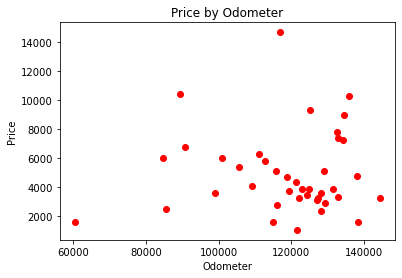

Correlation Coefficient: 0.02138849763563592


In [27]:
#make a scatter between milage and price

import matplotlib.pyplot as plt
plt.scatter(df['milage'] , df['brand_price'], color='red')
plt.title("Price by Odometer")
plt.xlabel("Odometer")
plt.ylabel("Price")
plt.show()


correlation_coefficient = df["milage"].corr(df['brand_price'])
print("Correlation Coefficient:", correlation_coefficient)


This is an undefined relationship between odometer and price, meaning that there are a wide range of prices or each type of milage in the odometer. 140000 miles has sometimes up to 30,000 dollar cost, which is surprising. I had predicted before that the more milage cars would be on the less expensive range

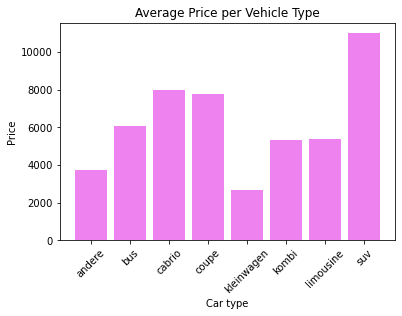

In [28]:
#bar plot between price and brands

# Group by 'Category' and calculate the sum of 'Value'
grouped_vehicle_types = autos.groupby('vehicle_type', as_index=False).mean()
# Sort the grouped DataFrame by 'Value' in descending order
sorted_vehicle_types = grouped_vehicle_types.sort_values(by='price', ascending=False)

plt.bar(grouped_vehicle_types['vehicle_type'], grouped_vehicle_types['price'], color='violet')
plt.xticks(rotation = 45)
plt.xlabel("Car type")
plt.ylabel("Price")
plt.title("Average Price per Vehicle Type")
plt.show()



It looks like the prices vary by vehicle type: SUV is the most expensive on average, cabrio, cupre and bus follow

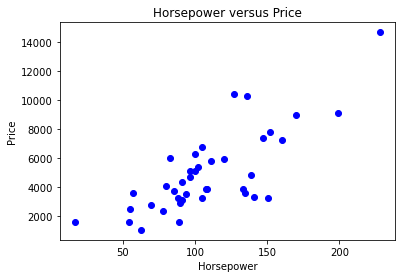

Correlation Coefficient: 0.7696252666739318


In [29]:
autos = autos[autos['power_PS']<600]
average_price = {}
typed = autos["brand"].unique()
for b in typed:
    selected_rows = autos[autos["brand"] == b]
    average_price[b] = round(selected_rows["price"].mean(),2)
price_series = pd.Series(average_price)

average_ps = {}
typed = autos["brand"].unique()
for b in typed:
    selected_rows = autos[autos["brand"] == b]
    average_ps[b] = round(selected_rows["power_PS"].mean(),2)
ps_series = pd.Series(average_ps)

df2 = pd.DataFrame(price_series, columns=['price'])
df2["power"] = ps_series

plt.scatter(df2['power'] , df2['price'], color='blue', label='Data Points')
plt.title("Horsepower versus Price")       
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()


correlation_coefficient = df2["power"].corr(df2['price'])
print("Correlation Coefficient:", correlation_coefficient)
          


As per both the graph and correlation coefficient, there is a positive correlation between horsepower and price, meaning that brands with better horsepower are generally more expensive

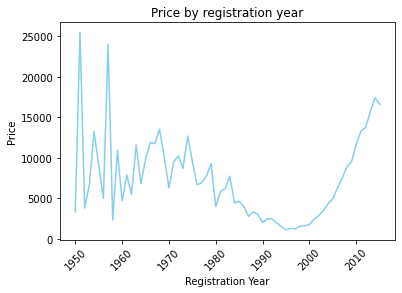

In [30]:
#bar plot between price and brands

# Group by 'Category' and calculate the sum of 'Value'
grouped_vehicle_types = autos.groupby('registration_year', as_index=False).mean()

plt.plot(grouped_vehicle_types['registration_year'], grouped_vehicle_types['price'], color='skyblue')
plt.xticks(rotation = 45)
plt.title("Price by registration year")
plt.xlabel("Registration Year")
plt.ylabel("Price")
plt.show()

As per the registration year by price graph, between 1950 and 1960 the prices are erratic, because sometimes "vintage" cars can be expensive. By 2000, prices slowly decline, then they go up after 2000. 1990 to 2000 registrations have the lowest price. 

In [31]:
#significant difference between price and notRepairedDamage\
import scipy.stats as stats
not_repaired = autos[autos["unrepaired_damage"] == "ja"]
print(not_repaired['price'].mean())
print(autos['price'].mean())
print("The chi squared and pvalue:\n")
#chisquared, pvalue = chisquare([not_repaired['price'].mean(), autos['price'].mean()])
finalstats = stats.ttest_ind(a=autos['price'], b=not_repaired['price'], equal_var=True)
print(finalstats)

2083.9525468001743
5165.032495147537
The chi squared and pvalue:

Ttest_indResult(statistic=35.846946443159666, pvalue=6.49210480085178e-278)


I used a t-test to determine if the mean price of cars with unrepaired damage is significantly different than the mean price of cars with either repaired or no damage. The p value is 6.49210480085178e-278, which means there is a significant difference between both datasets. Unrepaired damage severely affects the price of a car